In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

Input Image


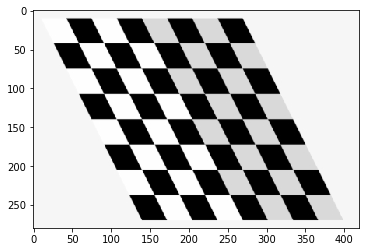

In [15]:
img = cv2.imread('checkerboard.jpg')  
D = img.copy()
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        

print('Input Image')
plt.imshow(img)
plt.set_cmap('gray')

Lines Detected using Hough Transformation


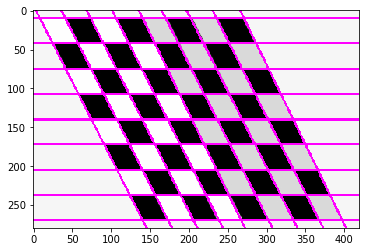

In [16]:
edges = cv2.Canny(grey, 18, 22)                     
lines = cv2.HoughLines(edges,1,np.pi/180,146)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 3000*(-b))
        y1 = int(y0 + 3000*(a))
        x2 = int(x0 - 3000*(-b))
        y2 = int(y0 - 3000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2) ##Lines detected from the hough Lines function. 

print('Lines Detected using Hough Transformation')
plt.imshow(img)    
plt.show()                       

In [17]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1
    rho2, theta2 = line2
    if (np.rad2deg(theta2-theta1) > 10):   ## checking to make sure lines are not parellel by checking the angle between them is
        A = np.array([
            [np.cos(theta1), np.sin(theta1)],
            [np.cos(theta2), np.sin(theta2)]
        ])
        b = np.array([[rho1], [rho2]])
        try:
            x0, y0 = np.linalg.solve(A, b)
        except:
            print("Singular matrix -- You should check that the lines are not close to parallel"
              "e.g. check that lines are not within 10 degrees of each other")
            raise
            x0, y0 = int(np.round(x0)), int(np.round(y0))
        return [[x0, y0]]

In [18]:
def segmented_intersections(lines):                            ## Code from stackoverflow link. 
    """Finds the intersections between groups of lines."""

    intersections = []
    for i, group in enumerate(lines[:-1]):
        for next_group in lines[i+1:]:
            for line1 in group:
                for line2 in next_group:
                    intersections.append(intersection(line1, line2)) 

    return intersections

In [19]:
intersections = segmented_intersections(lines)            ## getting intersections using above functions. 

Detected Corners


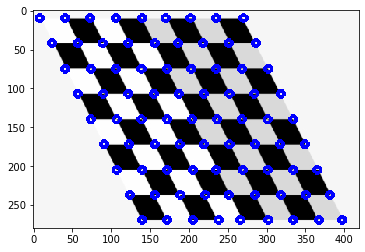

In [24]:
i = 0
for i in intersections:
    if i != None:
        cv2.circle(D,(i[0][0],i[0][1]),4,(0,0,255),thickness=3)

print('Detected Corners')
plt.imshow(D)
plt.show()         